## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Pertama-tama kita running terlebih dahulu library nya, kita menggunakan pandas dan numpy 

**1.2 Importing Dataset**

In [ ]:
!gdown --id 14DyHpnUj__OXTAVujuDC0EmYa65ep7d5

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14DyHpnUj__OXTAVujuDC0EmYa65ep7d5
To: /content/googleplaystore.csv
100% 1.36M/1.36M [00:00<00:00, 60.8MB/s]


Selanjutnya kita import dataset googel play store aps yang sudah di upload ke drive sebelumnya

In [ ]:
import pandas as pd
dataset = pd.read_csv('googleplaystore.csv')
dataset

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Kemudian kita Rename atau sesuaikan nama Dataset yang kita gunakan


## 2. Exploratory Data

In [ ]:
dataset.shape

(10841, 13)

Kemudian lanjut pada tahap berikutnya yaitu Exploratory Data digunakan untuk mengetahui apakah terdapat missing value pada data dan disni kita dapati 13 kolom dan 10841 baris pada Dataset

In [ ]:
dataset.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Genres', 'Last Updated'],
      dtype='object')

dataset.columns digunakan untuk mengetahui nama-nama kolom yang ada pada dataset


In [ ]:
dataset.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

dataset.dtypes digunankan untuk mengetahui jenis data terdapat 2 jenis data yang digunakan yaitu kategorical dan numerical

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


dataset.info() digunkan untuk mengetahui apakah terdapat Missing value pada data disini di datapi missing value karena terdapat angka/atau hasil yang berbeda diantara hasil 10841 terdapat 1 kolom yaitu Rating yang bernilai 9367

In [ ]:
dataset.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

Selanjutnya kita masuk pada tahap Handling Missing Value untuk mengecek dimana kolom yang terdapat Missing Value 

In [ ]:
dataset.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

dataset.isnull().sum() ini digunakan untuk mengecek kolom  mana saja yang terdapat Missing value dalam Dataset ini ada 4 kolom yaitu Rating, Type Content Rating dan Android Ver

In [ ]:
dataset['Rating'].dtypes

dtype('float64')

Pada kolom "Rating" type Datanya adalah float64

In [ ]:
dataset['Type'].dtypes

dtype('O')

Pada kolom "type" tpe datanya adalah dtype (0)

In [ ]:
dataset['Content Rating'].dtypes

dtype('O')

Pada kolom "Content Rating" type datanya adalah dtype (0)

In [ ]:
dataset['Current Ver'].dtypes

dtype('O')

In [ ]:
dataset['Android Ver'].dtypes

dtype('O')

Perform imputer to handle missing value in numerical data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

pada tahap ini kita mengimport semua data missing value dengan simpelimputer

In [ ]:
imputer = imputer.fit(dataset[['Rating']])
imputer

SimpleImputer()

selanjutnya kita input kolom yang berjenis numeri untuk di rata-ratakan

In [ ]:
dataset[['Rating']] = imputer.transform(dataset[['Rating']])
dataset.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

selanjutnya kita rata-ratakan maka jenis type datanya akan menjadi 0 dan menyisahkan type,Content Rating,Current Ver dan Android Ver yang berjenis kategorical

Using drop column tohandle missing value on categorical or object data

In [ ]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

App             0
Category        0
Rating          0
Reviews         0
Size            0
Installs        0
Price           0
Genres          0
Last Updated    0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [ ]:
dataset.describe()

,Rating
count,10841.000000
mean,4.193338
std,0.499557
min,1.000000
25%,4.100000
50%,4.200000
75%,4.500000
max,19.000000


<Axes: >

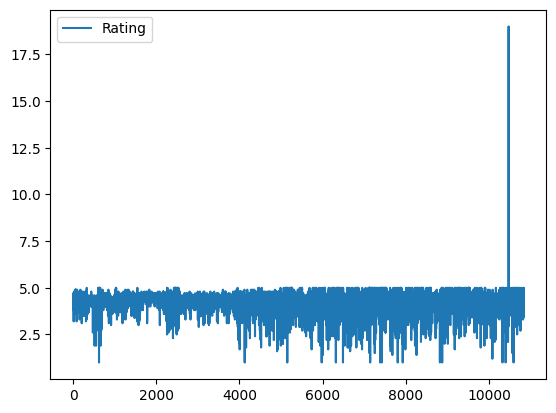

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

Selanjutnya kita menggunakan matplotlib.pyplot untuk melakukan visualisasi data, pada garis bewarna biru bisa di pastikan adalah outlayer karena memiliki garis yang menjulang lebih tinggi dari yang lainnya

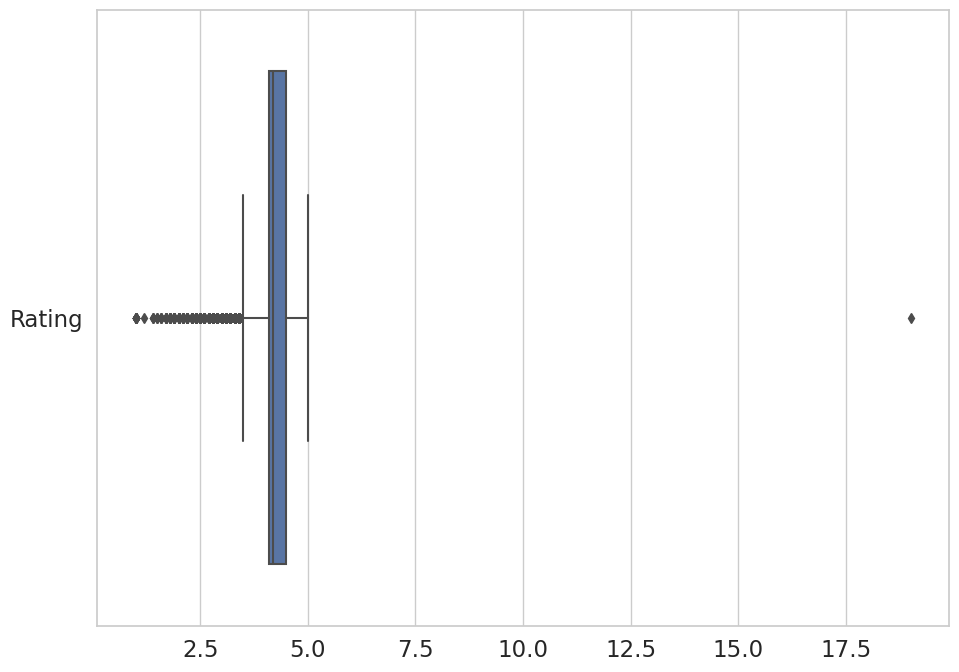

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Selanjutnya kita menggunakan boxplot, dan benar rating lah yang terdapat outlayer

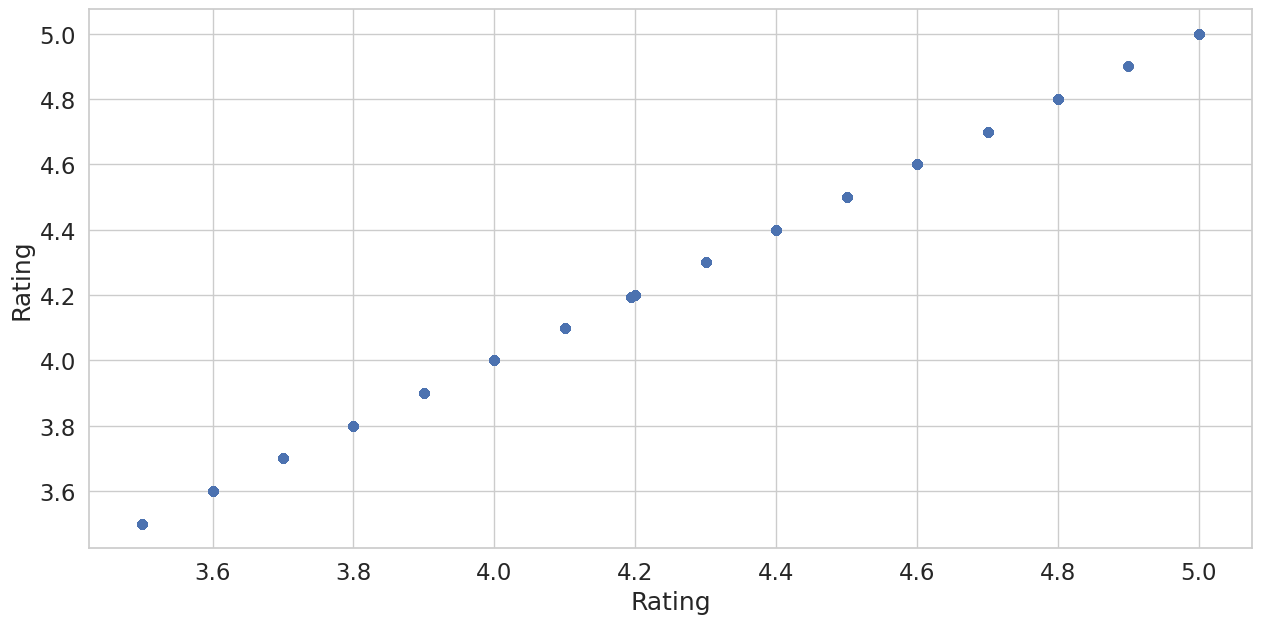

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Rating'], dataset['Rating'])
 
# x-axis label
ax.set_xlabel('Rating')
 
# y-axis label
ax.set_ylabel('Rating')
plt.show()

Selanjutnya untuk memaastikan kembali data kita gunakan scatter plot, terlihat ada titik yang berada di astas 17,5 titik itu adalah outlayer yang harusa kita bersihkan

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

Selanjutnya kita menghapus outlayer dengan metode inter kuartily dengan menghitung kuartilnya menjadi Q1 Q2 dan Q3 kemudaian di tentukan  nilai Upper dan Lower nya 

In [ ]:
import sklearn

# IQR Rating
Q1 = np.percentile(dataset['Rating'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Rating'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (10841, 9)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Rating'] > upper].index
outliers_lower = dataset[dataset['Rating'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (10107, 9)


<ipython-input-24-3f7f3e722b85>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


In [ ]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['Rating'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Rating'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (10107, 9)


In [ ]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Rating'] > upper].index
outliers_lower = dataset[dataset['Rating'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (10107, 9)


<ipython-input-26-3f7f3e722b85>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


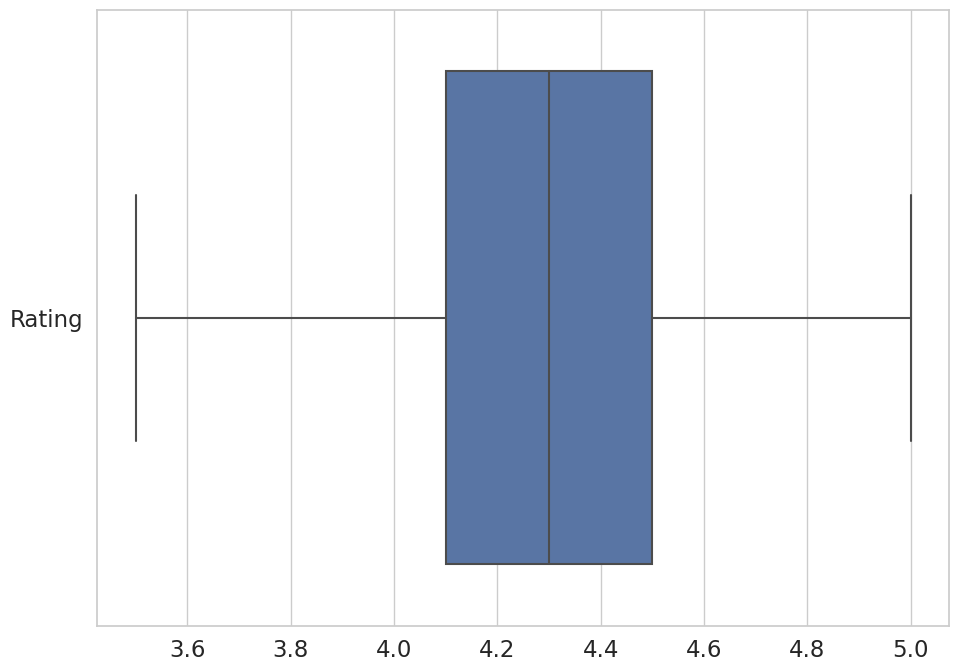

In [ ]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

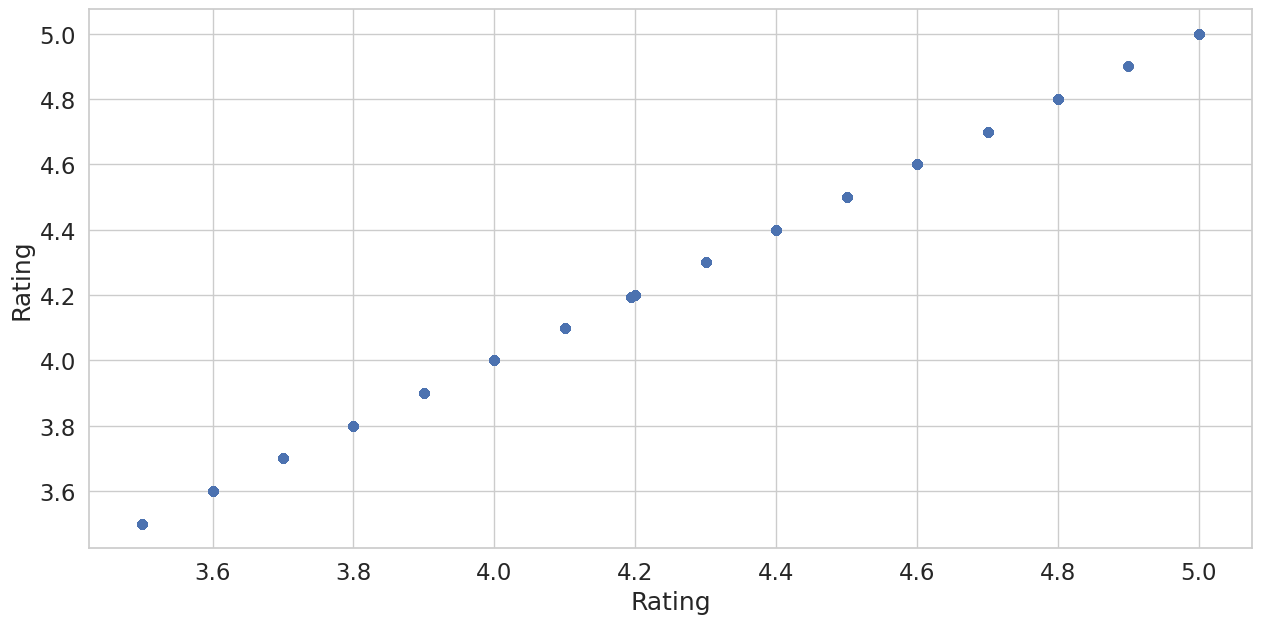

In [ ]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Rating'], dataset['Rating'])
 
# x-axis label
ax.set_xlabel('Rating')
 
# y-axis label
ax.set_ylabel('Rating')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

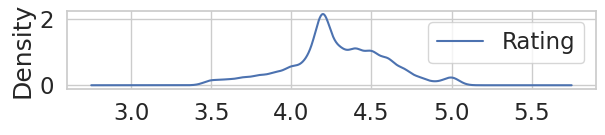

In [ ]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

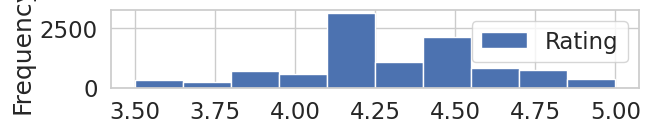

In [ ]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

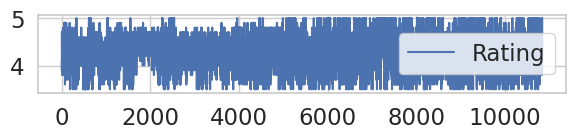

In [ ]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

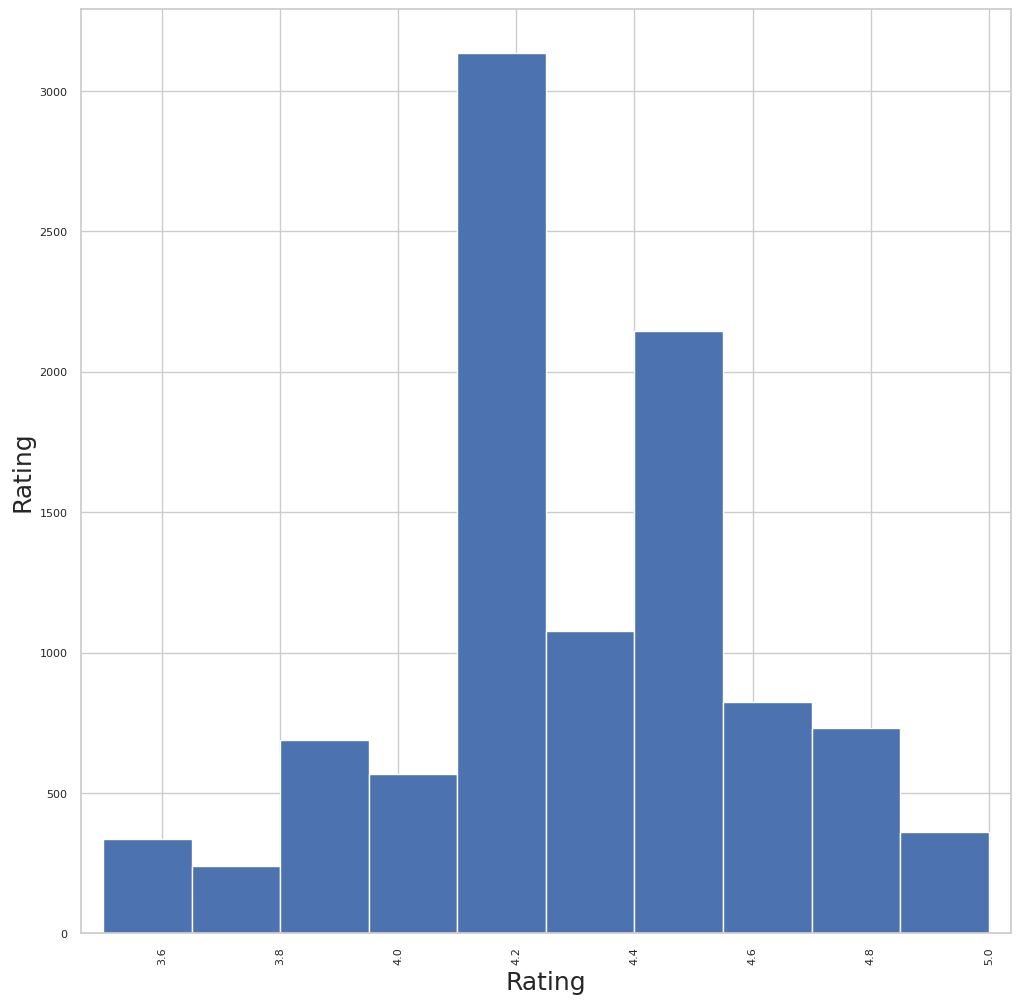

In [ ]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

<ipython-input-37-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


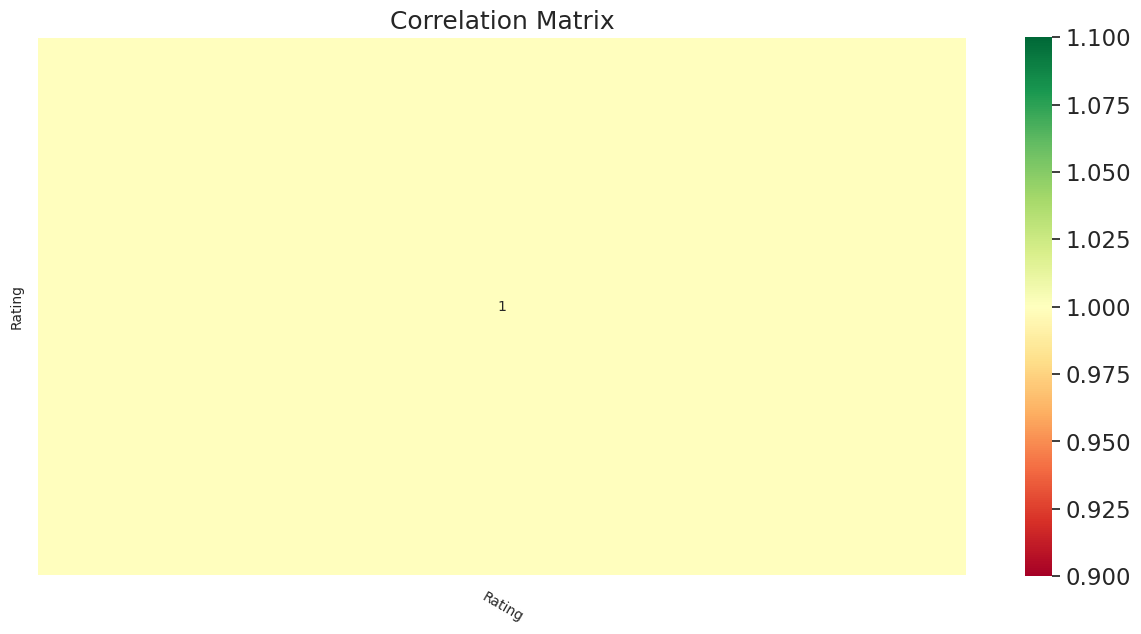

In [ ]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Dalam corellation Matrix ini kita mengkorelasi data

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [ ]:
x = dataset.drop('Rating', axis=1)
x

,App,Category,Reviews,Size,Installs,Price,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",0,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",0,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",0,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",0,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",0,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",0,Education,"July 25, 2017"
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,0,Education,"July 6, 2018"
10838,Parkinson Exercices FR,MEDICAL,3,9.5M,"1,000+",0,Medical,"January 20, 2017"
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",0,Books & Reference,"January 19, 2015"


Karena hanya tersisa kolom Rating pada tahap 4 ini Splitting Dataset saya tidak menggunakan x dan Y pada tabel namun langsung saya gunakan Rating pada kolom Type nya

Choose feature Type as a label

In [ ]:
y = dataset["Rating"]
y

0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10836    4.500000
10837    5.000000
10838    4.193338
10839    4.500000
10840    4.500000
Name: Rating, Length: 10107, dtype: float64

In [ ]:
y.values.reshape(-1,1)

array([[4.1       ],
       [3.9       ],
       [4.7       ],
       ...,
       [4.19333832],
       [4.5       ],
       [4.5       ]])

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

Selanjutnya pada tahap Categorical Encoding untuk mentransforming Data

In [ ]:
x = pd.get_dummies(x)
x

,"App_""i DT"" Fútbol. Todos Somos Técnicos.",App_+Download 4 Instagram Twitter,App_- Free Comics - Comic Apps,App_.R,App_/u/app,App_058.ba,App_1. FC Köln App,App_10 Best Foods for You,App_10 Minutes a Day Times Tables,App_10 WPM Amateur ham radio CW Morse code trainer,...,"Last Updated_September 7, 2015","Last Updated_September 7, 2016","Last Updated_September 7, 2017","Last Updated_September 8, 2013","Last Updated_September 8, 2015","Last Updated_September 8, 2016","Last Updated_September 8, 2017","Last Updated_September 9, 2015","Last Updated_September 9, 2016","Last Updated_September 9, 2017"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x.shape

(10107, 16775)

**4.2.1 Standarization**

Selanjutnya kita Standarisasi Datanya menggunakan function std_scale

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,16765,16766,16767,16768,16769,16770,16771,16772,16773,16774
0,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.014068,-0.009947,-0.009947,...,-0.014068,-0.009947,-0.022248,-0.009947,-0.009947,-0.014068,-0.022248,-0.009947,-0.014068,-0.009947
1,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.014068,-0.009947,-0.009947,...,-0.014068,-0.009947,-0.022248,-0.009947,-0.009947,-0.014068,-0.022248,-0.009947,-0.014068,-0.009947
2,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.014068,-0.009947,-0.009947,...,-0.014068,-0.009947,-0.022248,-0.009947,-0.009947,-0.014068,-0.022248,-0.009947,-0.014068,-0.009947
3,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.014068,-0.009947,-0.009947,...,-0.014068,-0.009947,-0.022248,-0.009947,-0.009947,-0.014068,-0.022248,-0.009947,-0.014068,-0.009947
4,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.014068,-0.009947,-0.009947,...,-0.014068,-0.009947,-0.022248,-0.009947,-0.009947,-0.014068,-0.022248,-0.009947,-0.014068,-0.009947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.014068,-0.009947,-0.009947,...,-0.014068,-0.009947,-0.022248,-0.009947,-0.009947,-0.014068,-0.022248,-0.009947,-0.014068,-0.009947
10103,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.014068,-0.009947,-0.009947,...,-0.014068,-0.009947,-0.022248,-0.009947,-0.009947,-0.014068,-0.022248,-0.009947,-0.014068,-0.009947
10104,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.014068,-0.009947,-0.009947,...,-0.014068,-0.009947,-0.022248,-0.009947,-0.009947,-0.014068,-0.022248,-0.009947,-0.014068,-0.009947
10105,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.009947,-0.014068,-0.009947,-0.009947,...,-0.014068,-0.009947,-0.022248,-0.009947,-0.009947,-0.014068,-0.022248,-0.009947,-0.014068,-0.009947


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


Selanjutnya kita Normalisai Data menggunakan nilai rata-rata dmulai dari (0-1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,16765,16766,16767,16768,16769,16770,16771,16772,16773,16774
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4.3 Splitting**

Selanjutnya masuk pada tahap Splitting yang di bagi menjadi 2 yaitu xtrain 80% dan xtest 20%

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({4.193338315362443: 1179, 4.4: 887, 4.3: 861, 4.5: 830, 4.2: 762, 4.6: 658, 4.1: 566, 4.0: 454, 4.7: 399, 3.9: 309, 3.8: 243, 5.0: 219, 3.7: 191, 4.8: 187, 3.6: 139, 3.5: 131, 4.9: 70})
Test distribution Counter({4.193338315362443: 295, 4.4: 222, 4.3: 215, 4.5: 208, 4.2: 190, 4.6: 165, 4.1: 142, 4.0: 114, 4.7: 100, 3.9: 77, 3.8: 60, 5.0: 55, 3.7: 48, 4.8: 47, 3.6: 35, 3.5: 32, 4.9: 17})


Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [ ]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LR: 0.864469 (0.007691)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.8705463182897862


[[1696   11   49]
 [ 117   47   53]
 [  83   14  456]]


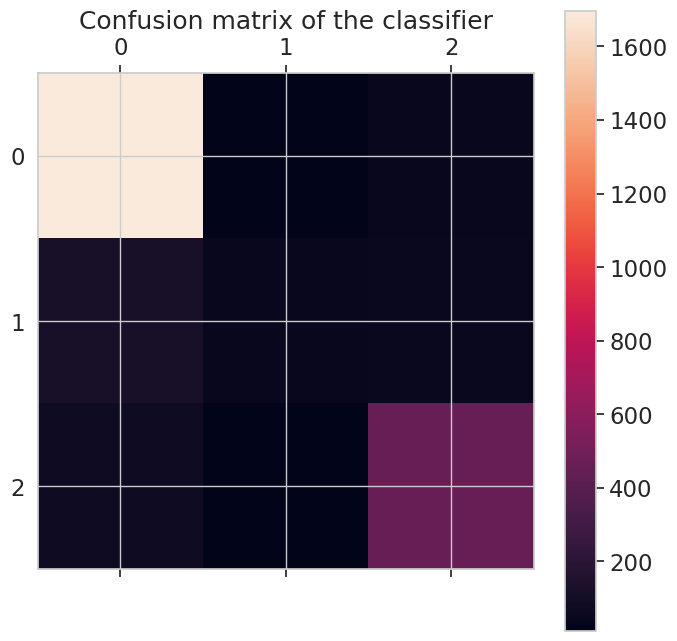

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           h       0.89      0.97      0.93      1756
           t       0.65      0.22      0.33       217
           u       0.82      0.82      0.82       553

    accuracy                           0.87      2526
   macro avg       0.79      0.67      0.69      2526
weighted avg       0.86      0.87      0.85      2526

